# Pre-machine learning

# Likelihood - Método metrópolis

Usando los mismos datos anteriores ahora intentaremos encontrar la recta más acercada con el método de metrópolis

In [36]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import pickle

In [40]:
#datos proporcionados por la maestra, son 3 columnas, x, y, error de y
#La columna "error de y" nos servirá para la distribución chi^2

data = np.loadtxt('data_gaussiano.dat') 
#data

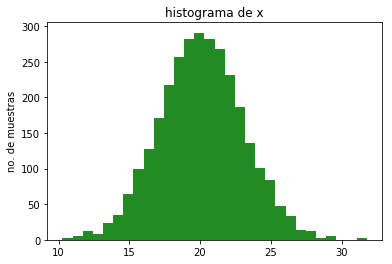

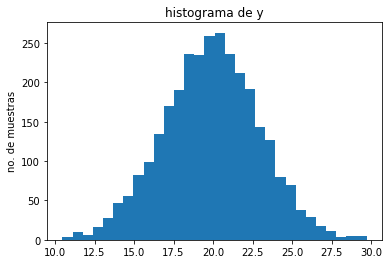

In [42]:
DesvEst = 3
mean = 20

x = data[0,:]
y = data[1,:]

#print(len(x))
#print(y)

n = len(x) #Tamaño de  nuestros vectores

#x_avrg = x.mean() 
#y_bar = y.mean()
a = 30 #numero de barras para el histograma
plt.hist(x,a,color ='forestgreen')
plt.ylabel('no. de muestras')
plt.title('histograma de x')
plt.show()

plt.hist(y,a)
plt.ylabel('no. de muestras')
plt.title('histograma de y')
plt.show()

In [5]:
""""Primero vamos a definir una función de una recta.
Nuestro propósito principal es encontrar los coeficientes m y b correctos tales que se ajustan a la solución obtenida en el
ejercicio pasado.
Vamos a conocer todos los m y b posibles que se acerquen a la solución ideal."""

n_pasos = 1000 #número de iteraciones que vamos a realizar nuestro experimento, mientras más grande más probable es que encontremos los m y b correctos

In [44]:
#definimos la función con la que aproximaremos nuestro likelihood, en este caso es una func. gaussiana
def f(x,DesviacionEstandar,xAverage):
    f = 1
    n = len(x)
    A = (2*np.pi*DesviacionEstandar)**(-1/2) #constante
    for i in range(n):
        f = A*f*(np.exp(-(1/(2*(DesviacionEstandar**2)))*(x[i] + xAverage)**2))
    return f

#definimos una función para el likelihood
def Likelihood(x,DesviacionEstandar,average):
    L=2
    n = len(x)
    for i in range(n):
        np.log(L) = np.log(L) + np.log(f(x[i],DesviacionEstandar,average))
    return L


SyntaxError: can't assign to function call (<ipython-input-44-14b565e91f36>, line 15)

In [7]:
"""Aquí vamos a comenzar a hacer iteraciones de los valores de m y de b para encontrar el que se acerque más a la línea ideal.
Para esto comenzaremos en los 'm' y 'b' que fijamos anteriormente y le añadiremos un valor ALEATORIO hacia el cual
se pueda mover de manera que se acerque a la solución más acertada"""



for i in range(1,n_pasos):
    m_rnd = np.random.rand(1) -0.5  #m aleatorios
    b_rnd = np.random.rand(1) - 0.5 #b aleatorios
    #el 0.5 es por mis huevos para que también nos den número negativos
    
    m_prueba = m[i-1] + m_rnd  #aquí guardamos moentáneamente 'm'
    b_prueba = b[i-1] + b_rnd #aquí guardamos moentáneamente 'b'
    
    f(x,m_prueba,b_prueba)
    L_chido = Likelihood(y,f,y_err)
    
    if L_chido >
    
#m

#b

SyntaxError: invalid syntax (<ipython-input-7-477494c11c15>, line 18)